# <center> Curso Machine Learning e Imágenes en Python 2020
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio
* Colaborador: Ing. Juan Manuel López


## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	**Umbralado y Binarización.** Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 

**CLASE 7: 28-09-2021** 

    Binarización. Operaciones Morfológicas.
    
archivos necesarios para la notebook:

**Imágenes necesarias: 'lenna.jpg', 'ortopantomografia2.png','monedas.jpg', 'daisy.jpg', 'sudoku.png'**

# Binarización por Umbralizado

Asigna valores mirando 1 solo pixel y si el valor de ese pixel tiene un valor mas grande o más chico que uno que se define como valor "umbral". Los valores que asigna son sólo 2 (por ellos binarizado). Blanco "1" o Negro "0". Se puenen poner varios umbrales.



* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, Otsu, etc.)
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
	0& r<umbral\\	
\end{array}
\right.$$

*O su negativo:

$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
	1& r<umbral\\	
\end{array}
\right.$$




* Se puede generalizar a segmentación por umbralizado (varios umbrales, por ejemplo MultiOtsu)



# Función de OpenCV cv2.threshold
Podemos hacer la binarización a mano o podemos usar directamente la funciond de opencv.


OpenCV nos provee la función "cv2.threshold" para binarizar una imagen, una vez que hemos elegido (por algún método) dicho umbral.

Se puede binarizar de  diferentes modos (cada tipo es un parámetro de la función)

* cv2.THRESH_BINARY      ----(Si se pasa del umbral: balnco, antes: negro)
* cv2.THRESH_BINARY_INV  ----(Si se pasa del umbral: negro, antes:balnco )
* cv2.THRESH_TRUNC       ----(Si se pasa del umbral: asigna el valor del umbral, antes:no modifica el dato )
* cv2.THRESH_TOZERO      ----(Si se pasa del umbral: no modifica el dato, antes:0 ) 
* cv2.THRESH_TOZERO_INV  ----(Si se pasa del umbral: 0, antes:no modifica el dato )


"thresh"-----> UMBRAL
"src(x,y)----> DATO DEL PIXEL SIN CAMBIAR

**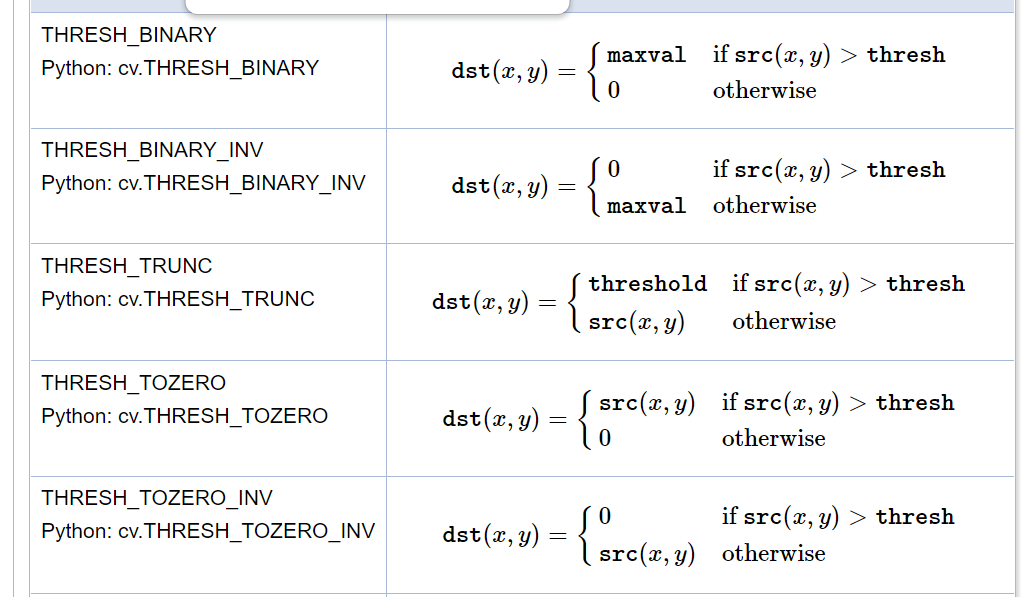

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
img=np.zeros((64,64))
grad=np.arange(0,256,4)  #gradiente de 0 a 255 de 4 en 4
for i in range(64):
 img[i,:]=grad

print(type(img))

##genero una imagen de bandas para apreciar el binarizado

<class 'numpy.ndarray'>


In [16]:
ret,thresh1 = cv2.threshold(img,63,255,cv2.THRESH_BINARY) #Funcion pide ("imagen","umbral","valor maximo","el tipo de binarización")
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

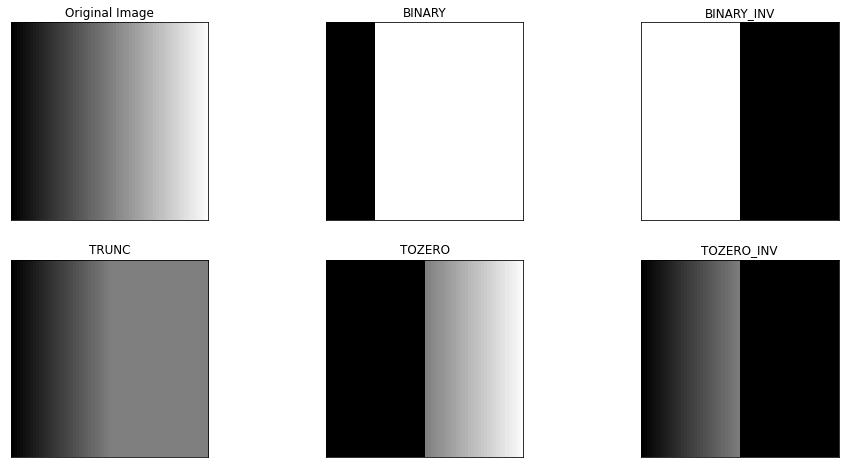

In [17]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] #son los titulos de los graficos
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


fig = plt.gcf()
fig.set_size_inches(16, 8)
for i in range(6):
    
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    #plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [15]:
print(img.dtype,thresh1.dtype)

float64 float64


**¿Cómo elegimos el umbral?** 
¡¡El histograma ayuda!!

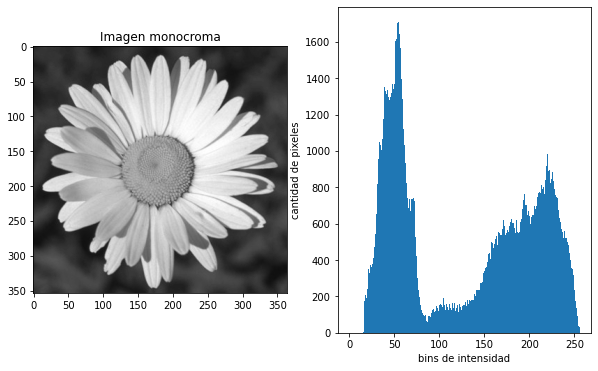

In [20]:
img = cv2.imread('daisy.jpg',0)         #CARGO LA IMAGEN MONOCROMA Y SU HISTOGRAMA.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')

axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()



**Elegimos el umbral "a ojo"** por ejemplo en esta imagen vemos que hay 2 distribuciones maximas en la zona de intencidad 50 y 230. podemos elegir el umbral en 130 por ejemplo.

In [29]:
umbral=130  #podemos cambiar el valor y ver como afecta
ret,binaria = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)# 2salidas-->"ret":umbral y "binaria":imagen binarizada
print(type(img[0,0]),type(binaria[0,0]))


<class 'numpy.uint8'> <class 'numpy.uint8'>


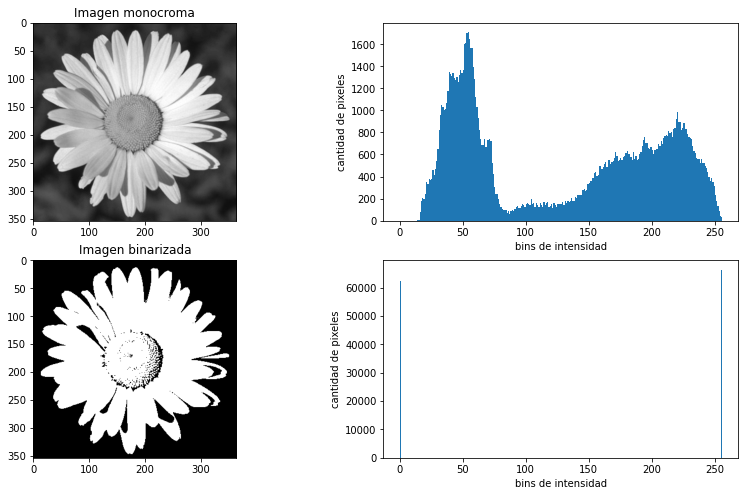

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(8)
fig.set_figwidth(14)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen binarizada')
axs[3].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()

**Tarea: a partir de la imagen 'ortopantomografia2', obtenga una imagen binaria con unos/true/255 en el lugar de los dientes**

<class 'numpy.uint8'> <class 'numpy.uint8'>


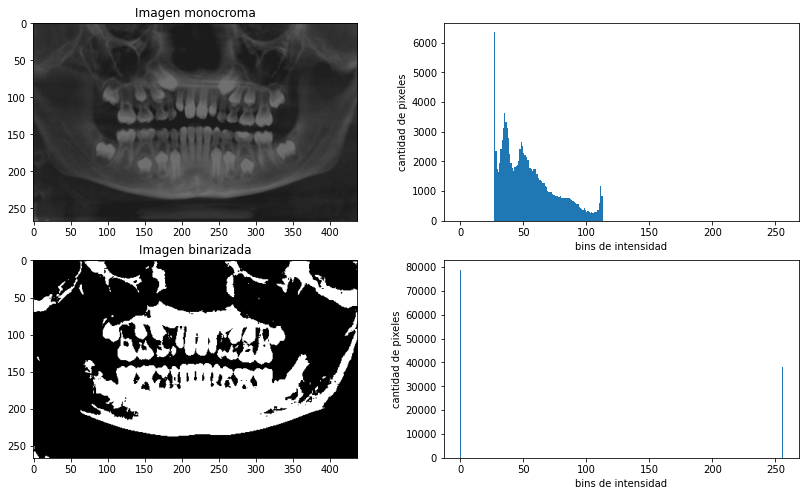

In [35]:
img2 = cv2.imread('ortopantomografia2.png',0)         #CARGO LA IMAGEN MONOCROMA

umbral2=60  #podemos cambiar el valor y ver como afecta
ret,binaria = cv2.threshold(img2,umbral2,255,cv2.THRESH_BINARY)
print(type(img2[0,0]),type(binaria[0,0]))



fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(8)
fig.set_figwidth(14)
axs[0].imshow(img2, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].hist(img2[:,:].ravel(), 256,[0,256] ) 
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen binarizada')
axs[3].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()

# Metodo Otsu para elección del umbral
**Hasta ahora hemos movido el parámetro del "tipo de binarización" pero el parámetro del umbral, lo elegimos a ojo y un poco arbitrariamente. Este método automatiza ese proceso.**

Elige un umbral para separar los pixeles en 2 clases, intentando que *la varianza  en cada clase sea mínima y la varianza entre las 2 clases sea máxima.*

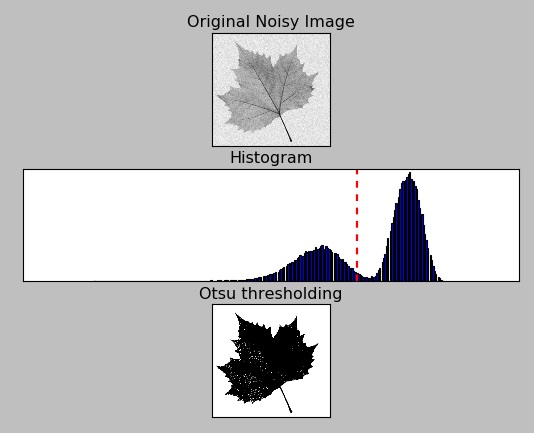


[Aqui](https://hbyacademic.medium.com/otsu-thresholding-4337710dc519) documentación más detallada

In [36]:
img = cv2.imread('monedas.jpg',0) #imagen monocroma
ret1,binaria1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #THRESH_OTSU: me define el umbral
print(type(img[0,0]),type(binaria1[0,0]),ret1)

#las 2 salidas que tengo son "ret1":umbral y "binaria1": imagen binarizada


<class 'numpy.uint8'> <class 'numpy.uint8'> 162.0


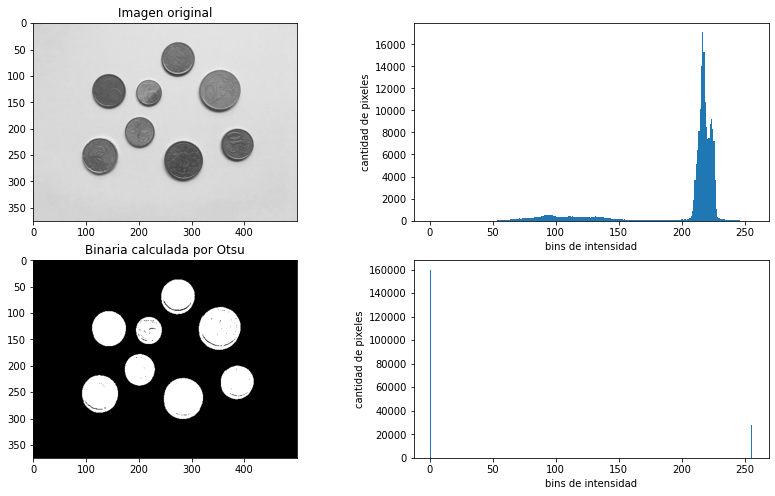

umbral calculado por Otsu: 162.0


In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(8)
fig.set_figwidth(14)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Binaria calculada por Otsu')
axs[3].hist(binaria1[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()
print('umbral calculado por Otsu:', ret1)

La razon para quere 1 y no ceros en ciertas zonas de la imagen es juntamente para poder operar la imagen, porder trabajar sobre ella en esa zona.

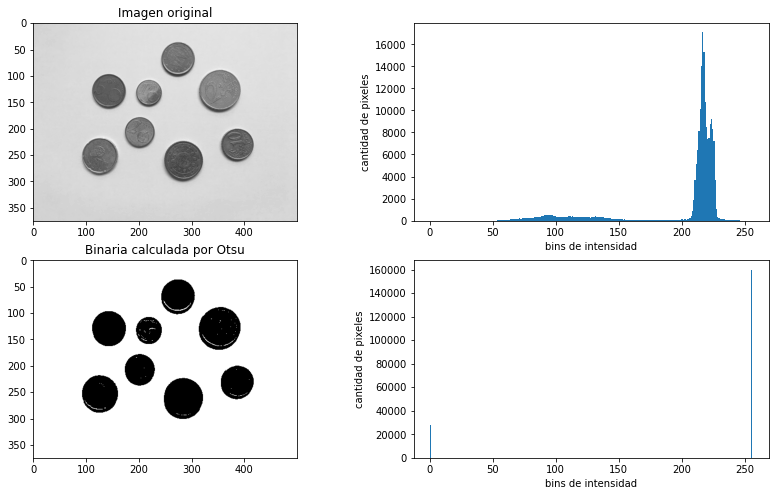

umbral calculado por Otsu: 162.0


In [40]:
ret1,binaria1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #cambio el criterio de binarizado en base al mismo umbral
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)                   # Aca las monedas tienen 0=NEGRO, por ello este criterio no me sirve
axs=axs.ravel()
fig.set_figheight(8)
fig.set_figwidth(14)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Binaria calculada por Otsu')
axs[3].hist(binaria1[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()
print('umbral calculado por Otsu:', ret1)

### Binarización adaptativa (umbral local: media o media ponderada gaussiana)

En vez de usar un "umbral globlal" para toda la imagen, calcula un umbral diferente para pequeñas subregiones de la imagen (el tamaño cuadrado de la subregión es un parámetro). Es aconsejado en imágenes con iluminación variable.

[AQUI](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html) MÁS INFOO

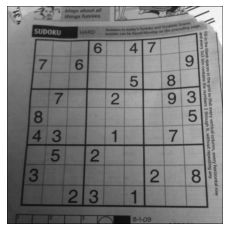

(565, 560) uint8


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('sudoku.png',0) #imagen monocroma
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.show()
print(img.shape,img.dtype)

In [42]:
binaria2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,2)
binaria3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
 #funcion toma("imagen","valor max si pasa el umbral","tipo de umbralizado con media o media ponderada","tipo de binarizacion"....
#.....,"tamaño de la region","constante que resta al umbral decisor")

#en la primera linea toma el promedio como umbral o el promedio "-2", para eso sirve la ultima cte. Mientras más grande esta cte +BLANCO queda 

#vamos a comparar los umbrales adaptativos con un umbral global que toma la media de la imagen como umbral 
umbral=img.mean()
ret4,binaria4 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)

titles = ['Original Image', 'Binaria adapt. con umbral dado por la media'
, 'Binaria adapt. con umbral Gaussiano', 'Binaria global con umbral  dado por la media' ]
images = [img, binaria2, binaria3, binaria4]




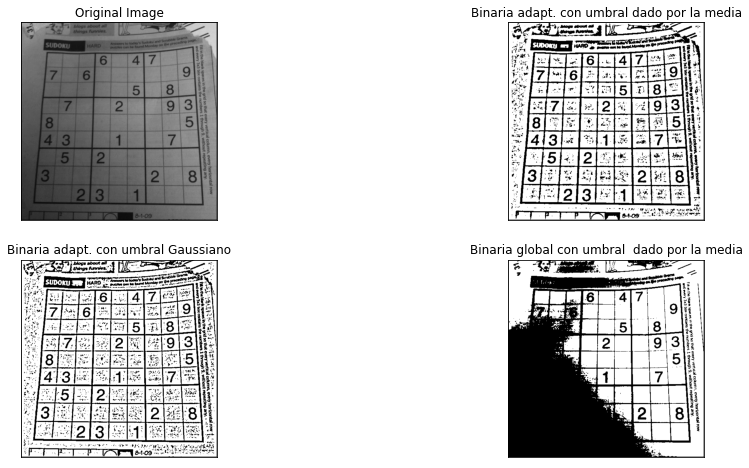

In [43]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0 ,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Vemos que el umbral GLOBAL en una imagen con iluminacion variable me genera un binarizado que me hace perder información.
-------------------------------------------------------------------------------

# Filtros de mínimo y de máximo en imágenes binarias.
Llamados "erosion" y "dilatación" en el contexto de "Morfología"

Se utiliza en todos los casos un elemento estructurante (sería como un kernel o máscara) de forma variable. El elemento estructurante se conoce como **EE** o también **SE** (Structuring Element).

El **EE** define los píxeles que se usan en la operación y los que no. En general es simétrico

Erosión y dilatación se usa para imágenes binarias 
(se generaliza a grises como filtros de mínimo y máximo)

La erosión reduce la superficie de las regiones blancas (objetos).

La dilatación amplía o completa las superficies blancas.

**Dilatación**  ↔  Filtro de Máximo sobre los lugares definidos por el EE (como 1's).

Al dilatar las regiones blancas aumentan su tamaño, pero pueden perderse detalles de la forma. Se rellenan intersticios de las regiones y también, como efecto muchas veces pernicioso, se pueden fusionar objetos diferentes que se encuentren próximos entre si. Cuando el elemento estructurante es grande el efecto es más acusado.

**Erosión**  ↔  Filtro de Mínimo sobre los lugares definidos por el EE (como 1's).

Esta operación reduce el tamaño de los objetos/regiones blancas. Se erosionará o eliminará de la región, es decir se colocará como 0, cada pixel centrado en el pivote que tenga algún cero en los lugares definidos por el EE (pues el mínimo dará 0).

Los intersticios se agrandan, la separación entre objetos crece, elementos pequeños de la imagen pueden desaparecer por lo que es muy útil para eliminar ruido impulsional o de pequeño tamaño.

**Aunque el efecto es contrario al de la dilatación esto NO debe llevar al error de considerar que erosionando una imagen dilatada seremos capaces de recuperar la imagen original, esto NO es así. NO son operaciones reversibles, y menos una la inversa de la otra.**


In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 5)) #Función del OPENCV que me devuelve diferentes elementos estructurantes o kernels
print(kernel,type(kernel),type(kernel[0,0]))

[[0 0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 0]] <class 'numpy.ndarray'> <class 'numpy.uint8'>


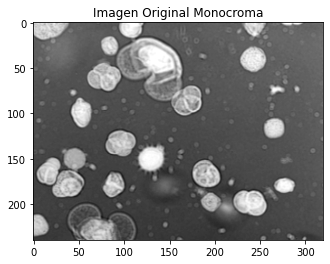

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('POLLENS.TIF',0) #primero leemos una imagen en grises
plt.imshow(img,cmap='gray'),plt.title('Imagen Original Monocroma')
plt.show()

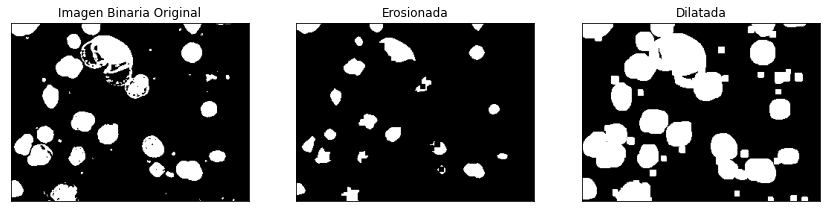

In [46]:
#la binarizamos con umbral automático (Por el método de Otsu)
umbral_otsu,img_binaria = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((7,7),np.uint8)#creamos el elemento estructurante

bin_erosionada = cv2.erode(img_binaria,kernel,iterations = 1)# erosionamos la imagen binaria, si subo las iteraciones sube el efecto de la erosión o dila
bin_dilatada = cv2.dilate(img_binaria,kernel,iterations = 1) #dilatamos la imagen binaria

#graficamos: imagen binaria, erosionada y dilatada
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img_binaria,cmap='gray'),plt.title('Imagen Binaria Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(bin_erosionada,cmap='gray'),plt.title('Erosionada'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bin_dilatada,cmap='gray'),plt.title('Dilatada'),plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('erosionada.png',bin_erosionada)
#cv2.imwrite('dilatada.png',bin_dilatada)

SE PUEDE OBSERVAR QUE LA FORMA DEL ELEMENTO ESTRUCTURANTE ES MUY IMPORTANTE, DEBO BUSCAR UNO CON FORMA PARECIDA A LA IMAGEN QUE QUIERO TRABAJAR. 

NO PODEMOS APLICAR FILTRO GAUSSIONAO PORQUE ME ELIMINA LA IMAGEN COMO TAL, ME DESDIBUJA LOS BORDES

**Ejercicio:** Repita el ejercicio anterior pero cambiando el elemento estructurante por uno que crea más adecuado al problema.

In [ ]:
#DIFERENTES ELEMENTOS ESTRUCTURANTES O KERMELS
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 5))

kernel = cv2.getStructuringElement(cv2.MORPH_....




**Aunque el efecto de erosión es contrario al de la dilatación esto NO debe llevar al error de considerar que erosionando una imagen dilatada (o dilatar una imagen erosionada) seremos capaces de recuperar la imagen original, esto NO es así.** 

**NO son operaciones reversibles, y menos una la inversa de la otra.**

**Apertura** (nuevo operador)

**Erosión seguida de Dilatación.** suaviza bordes y rellena huecos

Al erosionar se pierden detalles pequeños (ruidos), pero la imagen se achica. Si luego la dilatamos se expande y podemos volverla de tamaño similar a la original, ya sin los detalles molestos.


La imagen (c) se obtiene abriendo sobre (a) con EE (b). La imagen (e), abriendo sobre (a) con EE (d).

Se puede ver que son **todos** los puntos de la imagen original que coinciden con el EE. Vemos que sacó puntos molestos.


**Cierre**  (nuevo operador) suaviza bordes y conecta regiones

**Dilatación seguida de Erosión.**

Al dilatar se cierran insterticios, pero la imagen crece. Al erosionar luego, vuelve a un tamaño similar al original.


Arriba : imagen original y elemento estructurante. 

Abajo izquierda: apertura

Abajo derecha : cierre

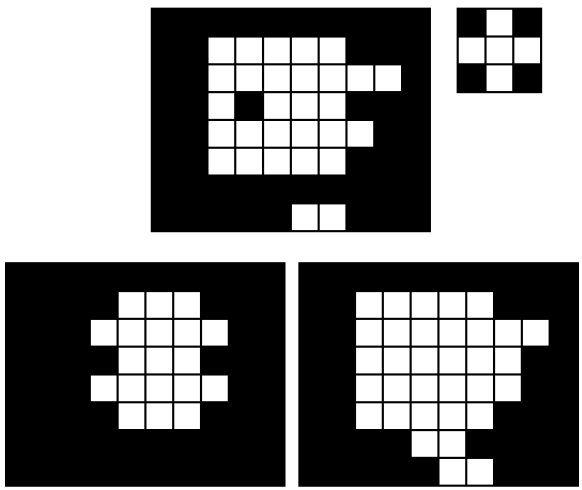

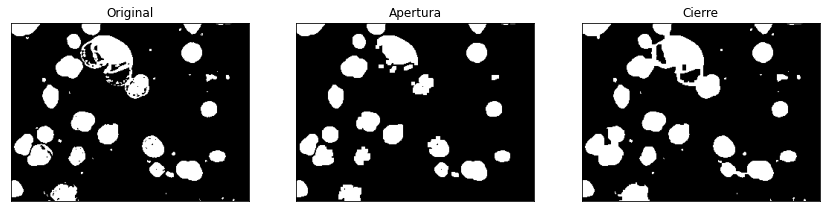

In [47]:
#Operaciones de apertura y cierre- Funciones del OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

imga = cv2.imread('POLLENS.TIF',0)
ret,img = cv2.threshold(imga,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((5,5),np.uint8)
apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) #"cv2.morphologyEx" ejecuta ap o cierre. Doy (imagen, funcion apertura o cierre, el kernel)
cierre = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(apertura,cmap='gray'),plt.title('Apertura'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cierre,cmap='gray'),plt.title('Cierre'),plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('abierta.png',apertura)
#cv2.imwrite('cerrada.png',cierre)


**Extracción de Contornos** otra aplicación de estos operadores

Contorno Exterior = Dilatación - Imagen_Binaria

Contorno Interior= Imagen_Binaria - Erosión

Gradiente Morfológico= Dilatación - Erosión


[  0 255]


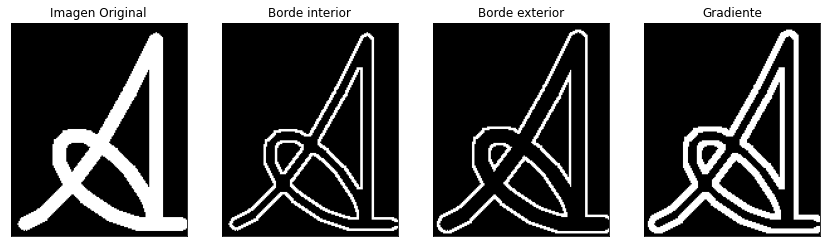

In [49]:
#Tomamos una imagen de la letra A y mostramos contornos y gradiente morfológico

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('A.png',0)      #lee la imagen en grises
ret,img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(np.unique(img_bin))

kernel = np.ones((5,5),np.uint8)      #crea el elemento estructurante
erosion = cv2.erode(img_bin,kernel,iterations = 1)
dilatacion = cv2.dilate(img_bin,kernel,iterations = 1)
gradiente=cv2.morphologyEx(img_bin,cv2.MORPH_GRADIENT,kernel)

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,4,1), plt.imshow(img_bin,cmap='gray'),plt.title('Imagen Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(img_bin-erosion,cmap='gray'),plt.title('Borde interior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(dilatacion-img_bin,cmap='gray'),plt.title('Borde exterior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(gradiente,cmap='gray'),plt.title('Gradiente'),plt.xticks([]), plt.yticks([])
plt.show()

**OPCIONAL: Esqueletización**


Este es un procedimiento para obtener un descriptor de una región mediante un grafo, la idea es que
dos objetos diferentes tendrán distinto grafo, que ocupan mucho menos espacio de almacenamiento
que la región y que son también más fáciles de procesar y comparar.

Suele ilustrarse el efecto de determinación del esqueleto como el último frente de fuego que quedaría si se pudiera encender simultáneamente todo el perímetro de la región y asumimos que este fuego avanza uniformemente. 

**Obtener el esqueleto mediante el cálculo de distancias sería muy costoso computacionalmente por lo que se sustituye por otro más rápido basado en la utilización de filtros morfológicos, que pueden orientarse a trabajar con conectividades a 4 o a 8.**

A base de sucesivas iteraciones se iría adelgazando la imagen, hasta obtener el esqueleto cuando no haya diferencia entre dos iteraciones sucesivas.

En cada iteración deben respetarse 2 normas:
• No suprimir puntos extremos
• No debe romperse la conectividad


In [50]:
#Esqueletización con OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
imga = cv2.imread('A.png',0)
size=np.size(imga)        #cantidad de píxeles
skel = np.zeros(np.shape(imga),np.uint8) #variable que va a almacenar el esqueleto
ret,img = cv2.threshold(imga,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#ret,img = cv2.threshold(imga,127,255,0)#binarizo

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))  #elijo EE
print(element)


[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [52]:
done = False
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)   #Hace apertura
    temp = cv2.subtract(img,temp)       #resta imagen-apertura
    skel = cv2.bitwise_or(skel,temp)    #or bit a bit entre el esqueleto temporal y el esqueleto definitivo
    img = eroded.copy()                 #copia la imagen erosionada y con ella seguirá trabajando
    zeros = size - cv2.countNonZero(img)#cuenta elementos ceros
    if zeros==size:
        done = True          #si la imagen erosionada ya no tiene elementos se terminó el proceso


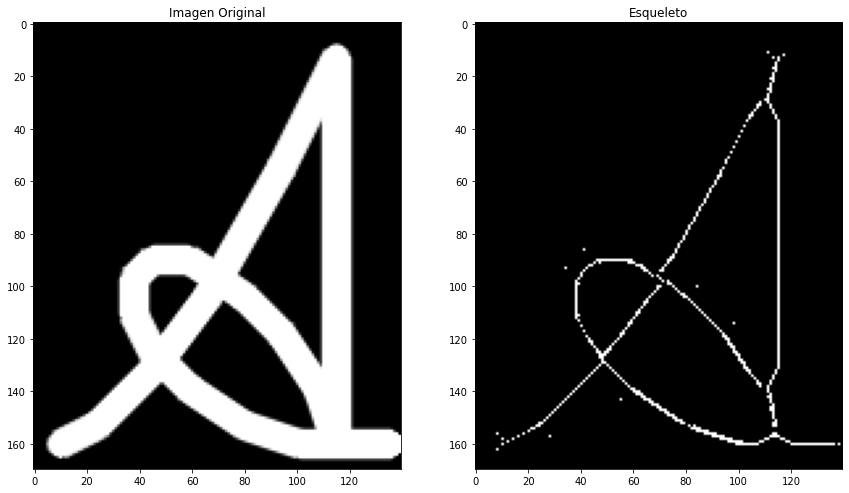

In [53]:
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)

plt.subplot(1,2,1), plt.imshow(imga,cmap='gray',vmin=0,vmax=255),plt.title('Imagen Original')
plt.subplot(1,2,2),plt.imshow(skel,cmap='gray'),plt.title('Esqueleto')
plt.show()

In [54]:
pip install scikit-image 

In [55]:
#Tener instalado scikit-image
#pip install scikit-image 
#Muchas funciones de esta librería están en subpaquetes
from skimage import io
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

#Importa una imagen que tiene en su carpeta
#horse=data.horse()
# Invert the horse image
#image = invert(horse)#calcula el negativo/invierte los valores

# perform skeletonization

image = invert(data.horse()) #Importa una imagen que tiene en su carpeta y toma el negativo con "invert" 
skeleton = skeletonize(image)
print('cargo una imagen de tipo', type(image[20,20]),image[20,20]) #notar que cargo una imagen  de tipo booleano
print('la esqueletización es de tipo' ,type(skeleton[20,20]),skeleton[20,20])



cargo una imagen de tipo <class 'numpy.bool_'> False
la esqueletización es de tipo <class 'numpy.bool_'> False


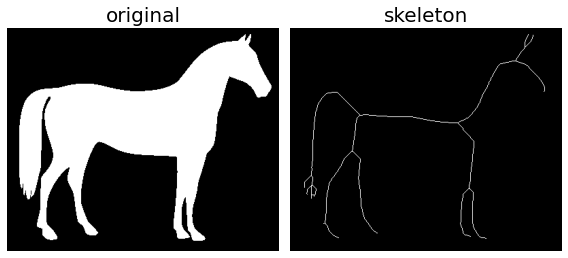

In [56]:
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()